In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Shri\OneDrive\Desktop\New folder\Dataset\Indicators.csv',sep=',')
data.head(5)
data.shape

(5656458, 6)

# Step 1: Initial exploration of the dataset

In [3]:
#how many unique country names are there

In [4]:
countries = data["CountryName"].unique().tolist()
len(countries)

247

In [5]:
# are there same number of country codes?
countryCodes = data["CountryName"].unique().tolist()
len(countryCodes)

247

In [6]:
# how many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

56

In [7]:
#what is the range of years?
print(min(years),'to',max(years))

1960 to 2015


# Matplotlib: Basic Plotting Part 1

In [8]:
# select CO2 emissions for the united status
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]



In [9]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


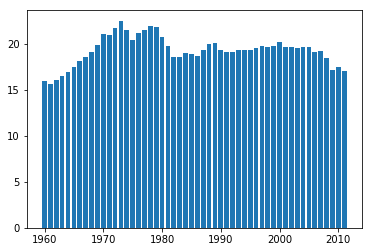

In [10]:
# lets see how emissions have changed over time using matplotlib
#get the years
years = stage['Year'].values
#get the values
co2 = stage['Value'].values
#create 
plt.bar(years,co2)
plt.show()

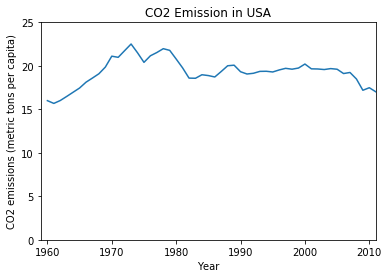

In [11]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

#label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#LAbel the figure
plt.title('CO2 Emission in USA')


#to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
plt.show()

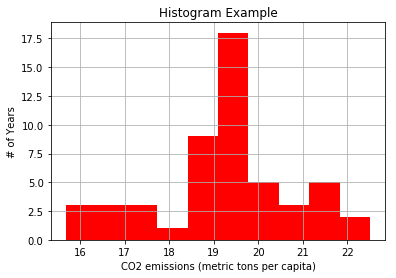

In [12]:
# the histogram of the data
hist_data=stage['Value'].values
plt.hist(hist_data,10,density=False,facecolor='red')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

In [13]:
#select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions\(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#apply our mask
co2_2011=data[mask1 & mask2]
co2_2011.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [14]:
print(len(co2_2011))

0


In [15]:
# subplots returnss a touple with the figure, axis attibutes
fig, ax=plt.subplots()
ax.annotate("USA",
           xy=(18, 5), xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
           connectionstyle="arc3"),
           )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 emissions per capita')


#plt.axis([10,22,0,14])
plt.grid(True)
plt.show()

In [21]:
#select GDP per capita emissions for the united states
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#stage is indicators matching the USA for country
gdp_stage = data[mask1 & mask2]

In [22]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


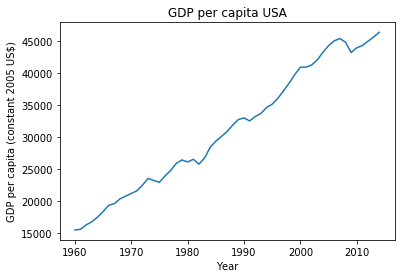

In [23]:
#switch to a lineplot
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)

#label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])


#label the figure
plt.title('GDP per capita USA')

# to make more honest, start they y axis at 0

plt.show()

In [24]:
print("GDP Min Year =", gdp_stage['Year'].min(), "max:",gdp_stage['Year'].max())
print("CO2 Min Year =", stage['Year'].min(),"max:",stage['Year'].max())

GDP Min Year = 1960 max: 2014
CO2 Min Year = 1960 max: 2011


In [26]:
#we have 3 extra years of gdp data, so let's trim those off so the scatterplot has equal length arrays to compare
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


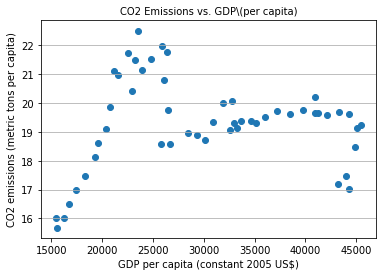

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# grid lines, Xticks, Xlabel, Y label

axis.yaxis.grid(True)
axis.set_title("CO2 Emissions vs. GDP\(per capita)",fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X=gdp_stage_trunc['Value']
Y=stage['Value']

axis.scatter(X,Y)
plt.show()

In [ ]:
np.corrcoef(gdp_stage_trunc[''])